In [17]:
# CPBL棒球數據分析與勝率預測
# 探索統計指標與勝率的關係

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [7]:
# 讀取數據
df = pd.read_csv("cpbl_team_stats_20-24.csv")

In [19]:
# 忽略警告
warnings.filterwarnings('ignore')

# 設定中文字體，以正確顯示中文
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 1. 數據加載與預處理
print("開始資料分析：CPBL 2020-2024年球隊數據與勝率關係")
print("-" * 60)

開始資料分析：CPBL 2020-2024年球隊數據與勝率關係
------------------------------------------------------------


In [21]:
# 分離年份和球隊名稱
df['年份'] = df['球隊'].str[:2].astype(int) + 2000
df['球隊名稱'] = df['球隊'].str[2:]

# 檢查數據缺失值
print("檢查數據缺失值：")
print(df.isnull().sum())

檢查數據缺失值：
球隊       0
W        0
L        0
Draw     0
PCT      0
AVG      0
OBP      0
SLG      0
OPS+     0
R       19
H       19
HR      19
BB      19
SO      19
SB      19
ERA      0
ERA+     0
WHIP     0
RA      19
年份       0
球隊名稱     0
dtype: int64


In [35]:
# 2. 探索性數據分析

# 選擇數值型列進行相關性分析
numeric_columns = ['W', 'L', 'Draw', 'PCT', 'AVG', 'OBP', 'SLG', 'OPS+', 'ERA', 'ERA+', 'WHIP']
df_numeric = df[numeric_columns]

In [29]:
# 計算勝率相關性
print("\n各指標與勝率(PCT)的相關性：")
correlation_with_pct = df_numeric.corr()['PCT'].sort_values(ascending=False)
print(correlation_with_pct)


各指標與勝率(PCT)的相關性：
PCT     1.000000
W       0.991587
OPS+    0.702522
OBP     0.523648
ERA+    0.463819
AVG     0.390086
SLG     0.246061
Draw    0.078559
ERA    -0.229942
WHIP   -0.382498
L      -0.974802
Name: PCT, dtype: float64


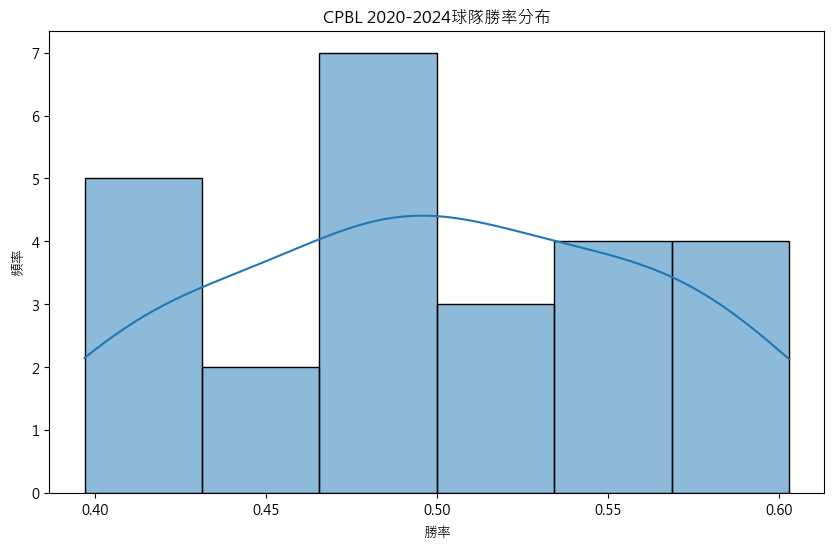

In [31]:
# 可視化勝率分布
plt.figure(figsize=(10, 6))
sns.histplot(df['PCT'], kde=True)
plt.title('CPBL 2020-2024球隊勝率分布')
plt.xlabel('勝率')
plt.ylabel('頻率')
plt.savefig('勝率分布.png', dpi=300, bbox_inches='tight')

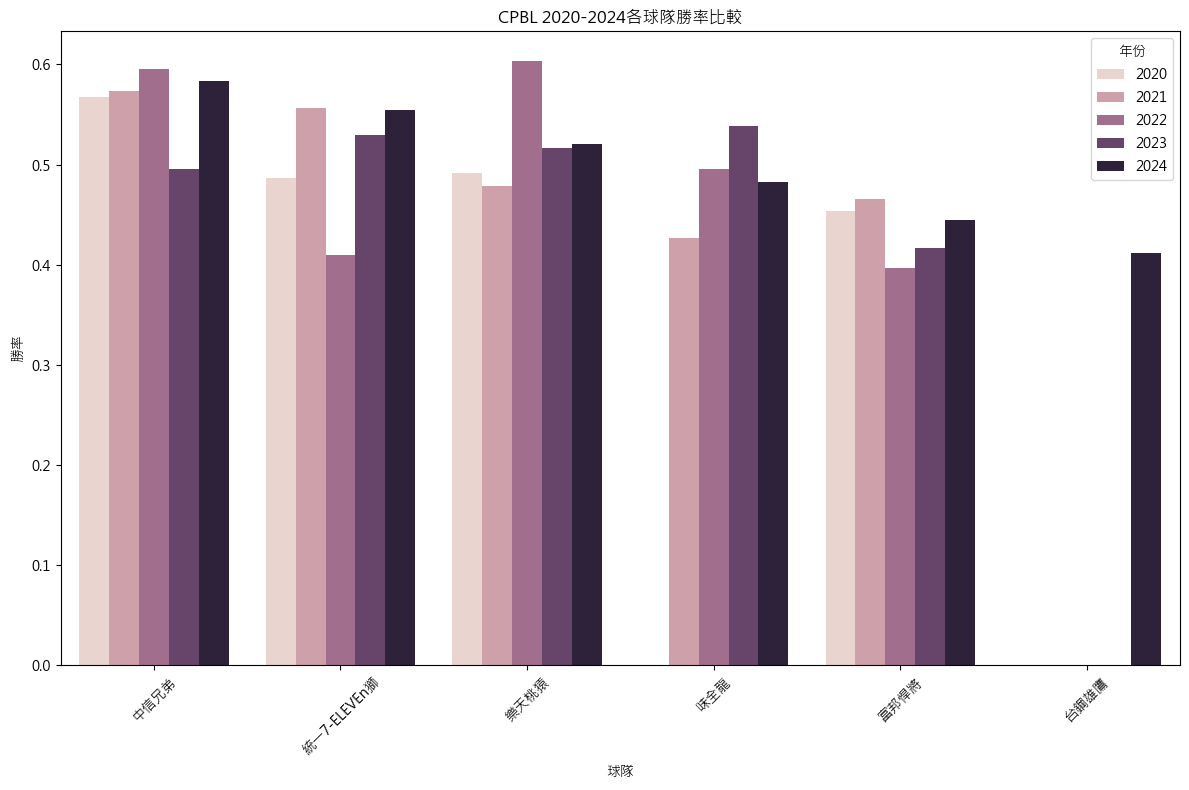

In [33]:
# 各球隊各年度勝率比較
plt.figure(figsize=(12, 8))
sns.barplot(x='球隊名稱', y='PCT', hue='年份', data=df)
plt.title('CPBL 2020-2024各球隊勝率比較')
plt.xlabel('球隊')
plt.ylabel('勝率')
plt.xticks(rotation=45)
plt.legend(title='年份')
plt.tight_layout()
plt.savefig('各球隊各年度勝率比較.png', dpi=300, bbox_inches='tight')

In [49]:
# 3. 關鍵指標與勝率的關係分析

# 創建一個包含主要打擊指標與勝率關係的多圖
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

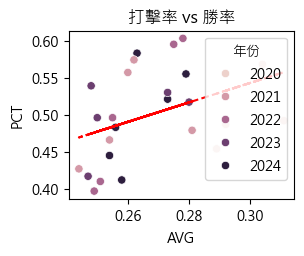

In [39]:
# 打擊率vs勝率
plt.subplot(2, 2, 1)
sns.scatterplot(x='AVG', y='PCT', hue='年份', data=df)
plt.title('打擊率 vs 勝率')
coefficient = np.polyfit(df['AVG'], df['PCT'], 1)
p = np.poly1d(coefficient)
plt.plot(df['AVG'], p(df['AVG']), 'r--')

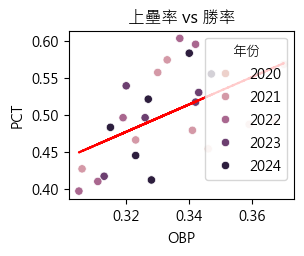

In [41]:
# 上壘率vs勝率
plt.subplot(2, 2, 2)
sns.scatterplot(x='OBP', y='PCT', hue='年份', data=df)
plt.title('上壘率 vs 勝率')
coefficient = np.polyfit(df['OBP'], df['PCT'], 1)
p = np.poly1d(coefficient)
plt.plot(df['OBP'], p(df['OBP']), 'r--')

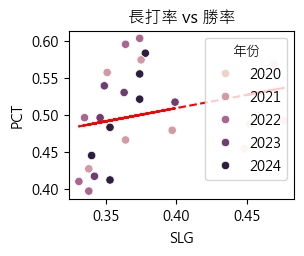

In [43]:
# 長打率vs勝率
plt.subplot(2, 2, 3)
sns.scatterplot(x='SLG', y='PCT', hue='年份', data=df)
plt.title('長打率 vs 勝率')
coefficient = np.polyfit(df['SLG'], df['PCT'], 1)
p = np.poly1d(coefficient)
plt.plot(df['SLG'], p(df['SLG']), 'r--')


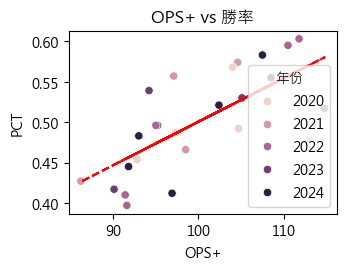

In [47]:
# 整體打擊能力vs勝率
plt.subplot(2, 2, 4)
sns.scatterplot(x='OPS+', y='PCT', hue='年份', data=df)
plt.title('OPS+ vs 勝率')
coefficient = np.polyfit(df['OPS+'], df['PCT'], 1)
p = np.poly1d(coefficient)
plt.plot(df['OPS+'], p(df['OPS+']), 'r--')
plt.tight_layout()
plt.savefig('打擊指標與勝率關係.png', dpi=300, bbox_inches='tight')

In [51]:
# 創建一個包含主要投球指標與勝率關係的多圖
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

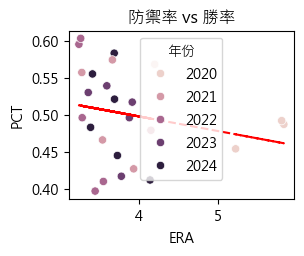

In [53]:
# 防禦率vs勝率
plt.subplot(2, 2, 1)
sns.scatterplot(x='ERA', y='PCT', hue='年份', data=df)
plt.title('防禦率 vs 勝率')
coefficient = np.polyfit(df['ERA'], df['PCT'], 1)
p = np.poly1d(coefficient)
plt.plot(df['ERA'], p(df['ERA']), 'r--')

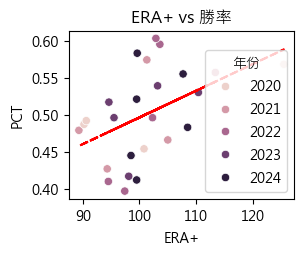

In [55]:
# ERA+vs勝率
plt.subplot(2, 2, 2)
sns.scatterplot(x='ERA+', y='PCT', hue='年份', data=df)
plt.title('ERA+ vs 勝率')
coefficient = np.polyfit(df['ERA+'], df['PCT'], 1)
p = np.poly1d(coefficient)
plt.plot(df['ERA+'], p(df['ERA+']), 'r--')

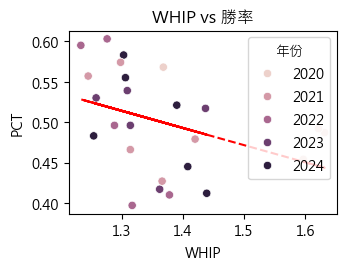

In [59]:
# WHIPvs勝率
plt.subplot(2, 2, 3)
sns.scatterplot(x='WHIP', y='PCT', hue='年份', data=df)
plt.title('WHIP vs 勝率')
coefficient = np.polyfit(df['WHIP'], df['PCT'], 1)
p = np.poly1d(coefficient)
plt.plot(df['WHIP'], p(df['WHIP']), 'r--')
plt.tight_layout()
plt.savefig('投球指標與勝率關係.png', dpi=300, bbox_inches='tight')

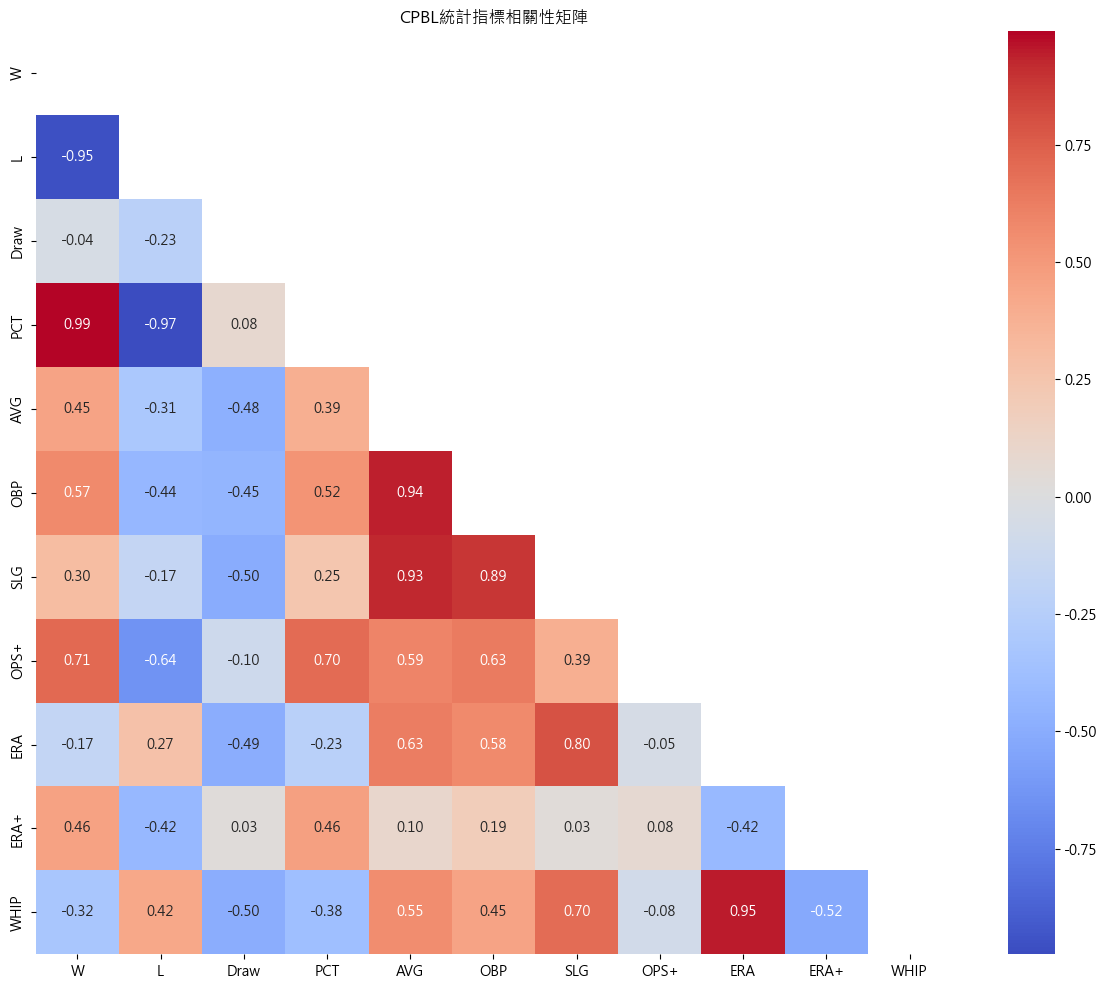

In [61]:
# 4. 相關性熱圖
plt.figure(figsize=(12, 10))
correlation_matrix = df_numeric.corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('CPBL統計指標相關性矩陣')
plt.tight_layout()
plt.savefig('相關性矩陣.png', dpi=300, bbox_inches='tight')

In [65]:
# 5. 建立預測模型

# 選擇特徵
features = ['AVG', 'OBP', 'SLG', 'OPS+', 'ERA', 'ERA+', 'WHIP']
X = df[features]
y = df['PCT']

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
# 線性回歸模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

In [71]:
# 隨機森林模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [73]:
# 模型評估
print("\n模型評估結果：")
print(f"線性回歸 MSE: {lr_mse:.6f}, R²: {lr_r2:.4f}")
print(f"隨機森林 MSE: {rf_mse:.6f}, R²: {rf_r2:.4f}")


模型評估結果：
線性回歸 MSE: 0.003608, R²: -1.7030
隨機森林 MSE: 0.004448, R²: -2.3325


In [75]:
# 線性回歸係數
coefficients = pd.DataFrame({
    '特徵': features,
    '係數': lr_model.coef_
})
coefficients = coefficients.sort_values(by='係數', ascending=False)
print("\n線性回歸模型係數（影響勝率的因素權重）：")
print(coefficients)


線性回歸模型係數（影響勝率的因素權重）：
     特徵        係數
0   AVG  2.743815
1   OBP  2.309450
4   ERA  0.014218
5  ERA+ -0.001314
3  OPS+ -0.002311
2   SLG -0.506699
6  WHIP -0.540908


In [77]:
# 6. 隨機森林特徵重要性
feature_importance = pd.DataFrame({
    '特徵': features,
    '重要性': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values(by='重要性', ascending=False)
print("\n隨機森林特徵重要性（影響勝率的因素權重）：")
print(feature_importance)



隨機森林特徵重要性（影響勝率的因素權重）：
     特徵       重要性
3  OPS+  0.366076
5  ERA+  0.277069
0   AVG  0.113016
6  WHIP  0.095815
1   OBP  0.070015
2   SLG  0.047087
4   ERA  0.030922


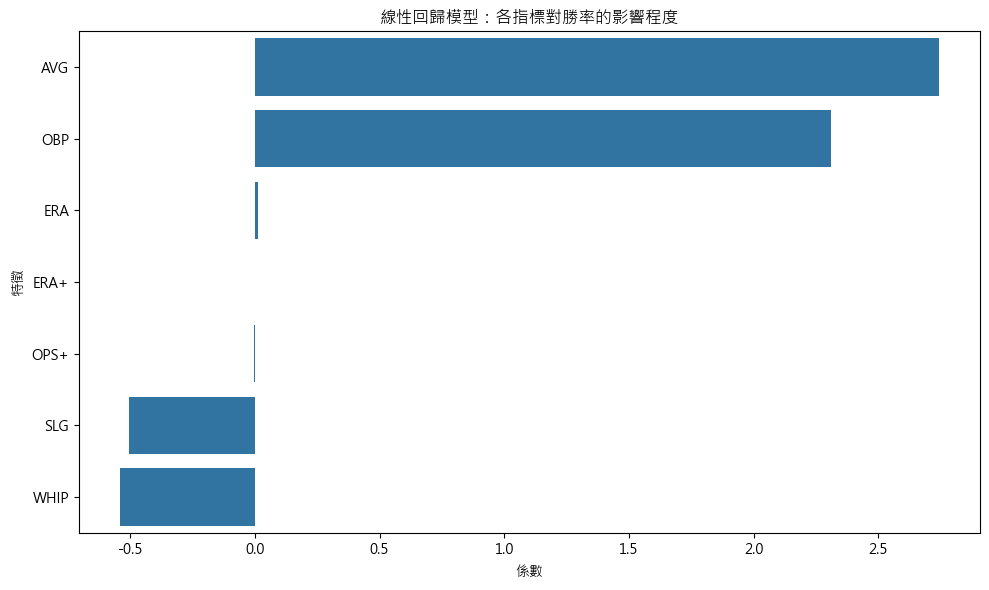

In [79]:
# 視覺化模型係數
plt.figure(figsize=(10, 6))
sns.barplot(x='係數', y='特徵', data=coefficients)
plt.title('線性回歸模型：各指標對勝率的影響程度')
plt.tight_layout()
plt.savefig('線性回歸係數.png', dpi=300, bbox_inches='tight')

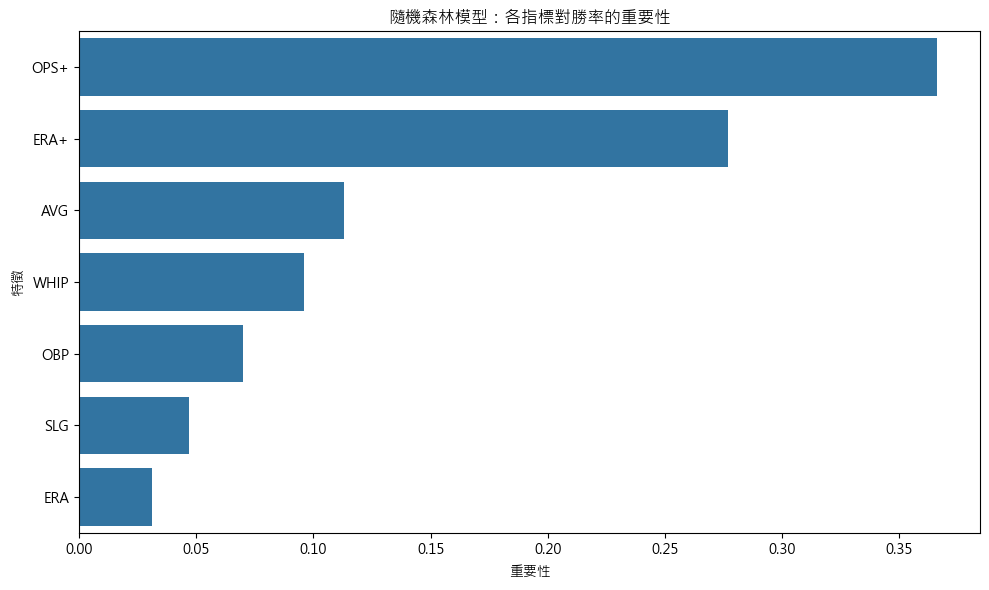

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x='重要性', y='特徵', data=feature_importance)
plt.title('隨機森林模型：各指標對勝率的重要性')
plt.tight_layout()
plt.savefig('隨機森林特徵重要性.png', dpi=300, bbox_inches='tight')


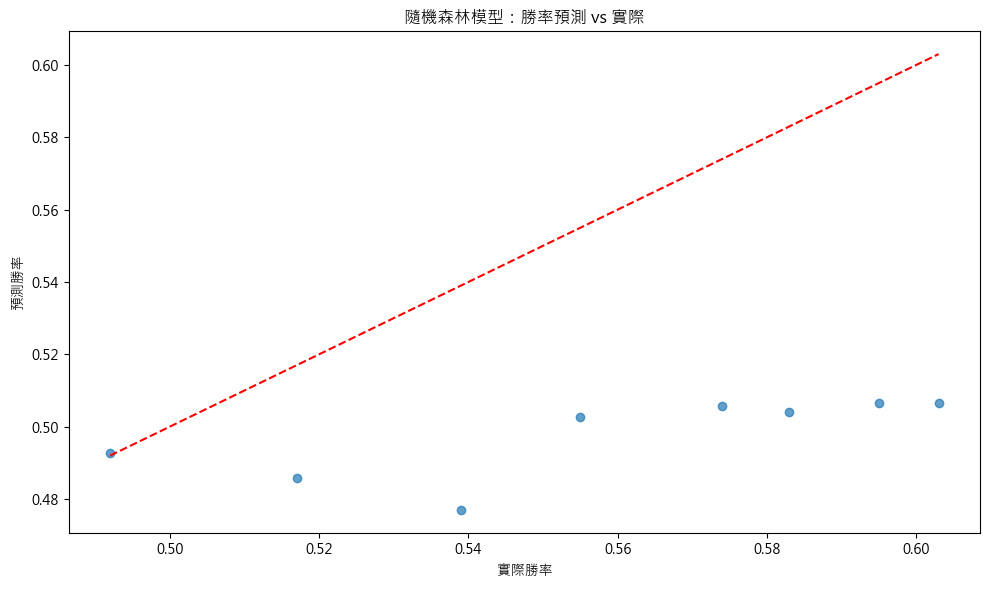

In [83]:
# 預測vs實際
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('實際勝率')
plt.ylabel('預測勝率')
plt.title('隨機森林模型：勝率預測 vs 實際')
plt.tight_layout()
plt.savefig('預測vs實際勝率.png', dpi=300, bbox_inches='tight')

In [85]:
# 7. 交叉驗證
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"\n交叉驗證R²分數：{cv_scores}")
print(f"平均R²分數：{cv_scores.mean():.4f}")



交叉驗證R²分數：[ 0.51309129 -0.2420291   0.79940825  0.5949965   0.14894287]
平均R²分數：0.3629


In [87]:
# 8. 預測2025年勝率（示範如何使用模型）
print("\n假設情境：預測2025年球隊勝率")
print("假設一支球隊有以下數據:")
example_team = pd.DataFrame({
    'AVG': [0.270],
    'OBP': [0.340],
    'SLG': [0.380],
    'OPS+': [105],
    'ERA': [3.50],
    'ERA+': [105],
    'WHIP': [1.280]
})
print(example_team)

predicted_pct_lr = lr_model.predict(example_team)[0]
predicted_pct_rf = rf_model.predict(example_team)[0]
print(f"線性回歸預測勝率: {predicted_pct_lr:.4f}")
print(f"隨機森林預測勝率: {predicted_pct_rf:.4f}")
print(f"預計勝場數 (假設打120場): {int(predicted_pct_rf * 120)}")


假設情境：預測2025年球隊勝率
假設一支球隊有以下數據:
    AVG   OBP   SLG  OPS+  ERA  ERA+  WHIP
0  0.27  0.34  0.38   105  3.5   105  1.28
線性回歸預測勝率: 0.5315
隨機森林預測勝率: 0.5036
預計勝場數 (假設打120場): 60


In [89]:
# 9. 分析結論
print("\n數據分析結論:")
print("1. 與勝率最相關的打擊指標是:", list(correlation_with_pct.index[1:4]))
print("2. 與勝率最相關的投球指標是:", [col for col in correlation_with_pct.index if col in ['ERA', 'ERA+', 'WHIP']][:2])
print(f"3. 模型預測準確度 (R²): {rf_r2:.4f}")
print("4. 根據隨機森林特徵重要性，最關鍵的勝率預測因素是:", feature_importance.iloc[0:3]['特徵'].tolist())

print("\n分析完成! 所有圖表已保存。")


數據分析結論:
1. 與勝率最相關的打擊指標是: ['W', 'OPS+', 'OBP']
2. 與勝率最相關的投球指標是: ['ERA+', 'ERA']
3. 模型預測準確度 (R²): -2.3325
4. 根據隨機森林特徵重要性，最關鍵的勝率預測因素是: ['OPS+', 'ERA+', 'AVG']

分析完成! 所有圖表已保存。
